In [2]:
%load_ext autoreload
%autoreload 2
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FLP
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

plt.style.use('ggplot')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

reload


In [3]:
import wrf

In [5]:
file_path = '/private/tmp/wrfout_d04_2018-04-08_15:00:00'

In [6]:
ds = xr.open_dataset(file_path)

In [25]:
cf = 'CLDFRA'
bt = 'bottom_top'
sn = 'south_north'
we = 'west_east'
d1 = ds[cf].isel(Time=1)
d1

<xarray.DataArray 'CLDFRA' (bottom_top: 49, south_north: 150, west_east: 153)>
[1124550 values with dtype=float32]
Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
    XTIME    datetime64[ns] ...
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  CLOUD FRACTION
    units:        
    stagger:      

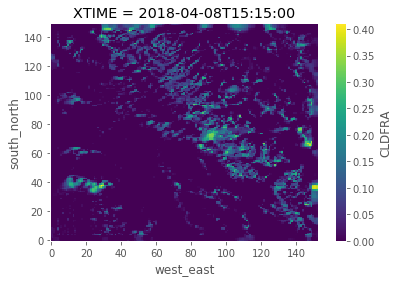

In [22]:
d1.mean(bt).plot();

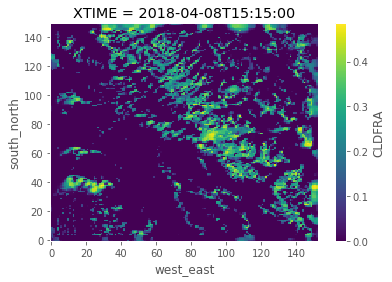

In [23]:
d1.std(bt).plot();

In [30]:
d2 = d1.stack(com=(sn,we))

In [31]:
d2

<xarray.DataArray 'CLDFRA' (bottom_top: 49, com: 22950)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    XLAT         (com) float32 -17.15197 -17.15197 ... -15.58474 -15.58474
    XLONG        (com) float32 -68.95856 -68.94759 ... -67.30312 -67.29216
    XTIME        datetime64[ns] ...
  * com          (com) MultiIndex
  - south_north  (com) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
  - west_east    (com) int64 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  CLOUD FRACTION
    units:        
    stagger:      

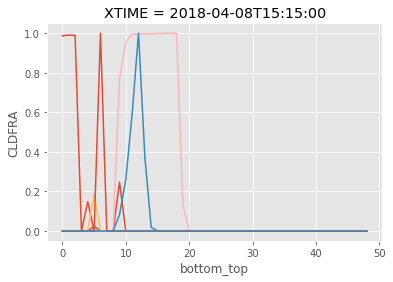

In [55]:
d2[:,::1000].plot.line(hue='com',add_legend=False);

In [63]:
ds['SWDOWN']

<xarray.DataArray 'SWDOWN' (Time: 4, south_north: 150, west_east: 153)>
array([[[ 955.3607 ,  955.39014, ...,  978.4422 ,  973.4342 ],
        [ 955.36786,  955.32587, ...,  975.87354,  978.859  ],
        ...,
        [ 960.0719 ,  962.4056 , ...,  884.2383 ,  883.88513],
        [ 959.25653,  960.474  , ...,  883.3915 ,  883.3026 ]],

       [[ 937.23016,  904.64404, ..., 1016.84686, 1011.5844 ],
        [ 936.82367,  965.8997 , ..., 1017.9973 , 1013.6499 ],
        ...,
        [ 990.8871 ,  993.1212 , ...,  910.5703 ,  910.15704],
        [ 990.0094 ,  991.11676, ...,  909.5668 ,  909.41815]],

       [[ 627.57227,  586.71185, ..., 1027.6101 , 1011.0773 ],
        [ 548.9021 ,  501.74792, ..., 1026.0366 , 1028.7985 ],
        ...,
        [1017.0129 , 1019.4899 , ...,  932.4488 ,  931.95996],
        [1015.9639 , 1017.29785, ...,  931.3257 ,  931.32007]],

       [[ 635.4135 ,  590.8062 , ..., 1058.1707 , 1042.2034 ],
        [ 598.28   ,  543.19086, ..., 1059.7262 , 1058.9124 ],
 

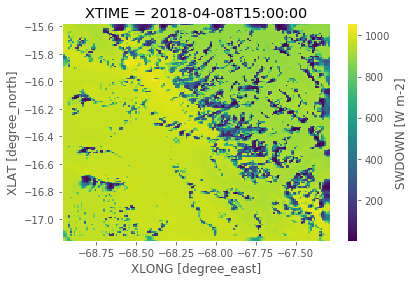

In [69]:
ds['SWDOWN'][0].plot(x='XLONG',y='XLAT')